In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

/home/arogya/.local/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
DATA_DIR = '../../data'

In [3]:
CENTROIDS = f'{DATA_DIR}/interim/modis/centroids.gpkg'
centroids = gpd.read_file(CENTROIDS)

# Rough

In [4]:
best_dates = pd.read_csv(f'{DATA_DIR}/inputs/best_dates.csv')
best_dates.head()

,Unnamed: 0,Latitude,Longitude,Best Start Date 2014,Best End Date 2014,Peak NDVI 2014,Best Start Date 2015,Best End Date 2015,Peak NDVI 2015,Best Start Date 2016,...,Peak NDVI 2017,Best Start Date 2018,Best End Date 2018,Peak NDVI 2018,Best Start Date 2019,Best End Date 2019,Peak NDVI 2019,Best Start Date 2020,Best End Date 2020,Peak NDVI 2020
0,0,36.742867,72.257067,2014-03-22,2014-04-06,-0.0017,2015-02-18,2015-03-05,-0.0159,2016-02-18,...,-0.0136,2018-03-06,2018-03-21,-0.0320,2019-04-07,2019-04-22,-0.0121,2020-03-05,2020-03-20,-0.0203
1,1,36.742867,72.259873,2014-03-22,2014-04-06,-0.0080,2015-02-18,2015-03-05,-0.0159,2016-02-18,...,-0.0147,2018-03-06,2018-03-21,-0.0245,2019-05-25,2019-06-09,-0.0124,2020-03-05,2020-03-20,-0.0194
2,2,36.742867,72.262678,2014-02-18,2014-03-05,-0.0050,2015-01-17,2015-02-01,-0.0135,2016-02-02,...,-0.0190,2018-03-06,2018-03-21,-0.0245,2019-05-09,2019-05-24,-0.0243,2020-01-17,2020-02-01,-0.0214
3,3,36.742867,72.265484,2014-02-18,2014-03-05,-0.0224,2015-03-22,2015-04-06,-0.0254,2016-04-22,...,-0.0185,2018-01-17,2018-02-01,-0.0069,2019-01-17,2019-02-01,-0.0197,2020-01-17,2020-02-01,-0.0209
4,4,36.742867,72.268290,2014-02-18,2014-03-05,-0.0235,2015-02-18,2015-03-05,-0.0261,2016-04-22,...,-0.0193,2018-02-02,2018-02-17,-0.0197,2019-01-17,2019-02-01,-0.0235,2020-01-17,2020-02-01,-0.0202


In [7]:
new_best_dates = centroids
new_best_dates['Latitude'] = new_best_dates.geometry.apply(lambda p: p.x)
new_best_dates['Longitude'] = new_best_dates.geometry.apply(lambda p: p.y)

In [9]:
new_best_dates = new_best_dates.sjoin(gpd.read_file(f'{DATA_DIR}/interim/child.gpkg'))
new_best_dates = new_best_dates[['Latitude', 'Longitude', 'BSD']]

In [10]:
new_best_dates

,Latitude,Longitude,BSD
508,64.062232,31.540973,2019-04-07
509,64.064477,31.540973,2019-04-07
510,64.066723,31.540973,2019-03-22
511,64.068969,31.540973,2019-03-22
512,64.071215,31.540973,2019-03-22
...,...,...,...
9410,64.165538,31.379276,2019-04-07
9411,64.167784,31.379276,2019-04-23
9412,64.170029,31.379276,2019-04-23
9413,64.172275,31.379276,2019-04-23


In [16]:
parent_modis = gpd.read_file('/data/tmp/arogya/data/interim/parent_best_dates.gpkg')
parent_modis.head()

,pgrid_id,ID_0,ISO,NAME_ENGLI,NAME_ISO,NAME_FAO,NAME_LOCAL,NAME_OBSOL,NAME_VARIA,NAME_NONLA,...,CARICOM,EU,CAN,ACP,Landlocked,AOSIS,SIDS,Islands,LDC,geometry
0,0,1,AFG,Afghanistan,AFGHANISTAN,Afghanistan,Afghanestan,None,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((60.45129 34.37614, 60.72031 34.39478..."
1,1,1,AFG,Afghanistan,AFGHANISTAN,Afghanistan,Afghanestan,None,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((60.47399 34.15319, 60.74231 34.17166..."
2,2,1,AFG,Afghanistan,AFGHANISTAN,Afghanistan,Afghanestan,None,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((60.49644 33.93021, 60.76408 33.94853..."
3,3,1,AFG,Afghanistan,AFGHANISTAN,Afghanistan,Afghanestan,None,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((60.51865 33.70721, 60.78560 33.72538..."
4,4,1,AFG,Afghanistan,AFGHANISTAN,Afghanistan,Afghanestan,None,None,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,"POLYGON ((60.54061 33.48419, 60.80689 33.50221..."


In [22]:
import os

files = [int(file.split('.tif')[0]) for file in os.listdir('/data/tmp/arogya/data/interim/modis/tiles')]
files

missing = set(parent_modis['pgrid_id']) - set(files)

<AxesSubplot:>

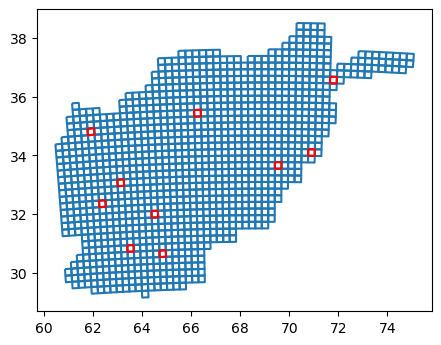

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,dpi=100)
parent_modis.boundary.plot(ax=ax)
parent_modis[parent_modis['pgrid_id'].isin(list(missing))].boundary.plot(ax=ax, color="red")
